In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# This ensures images display correctly in the notebook
%matplotlib inline 

print(f"TensorFlow Version: {tf.__version__}")

2025-12-11 05:42:03.504670: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-11 05:42:03.565078: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-11 05:42:05.150573: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


TensorFlow Version: 2.20.0


In [2]:
# Load CIFAR-10 dataset
print("Downloading and loading data...")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the text labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

print("Data loaded successfully!")

Data loaded successfully!


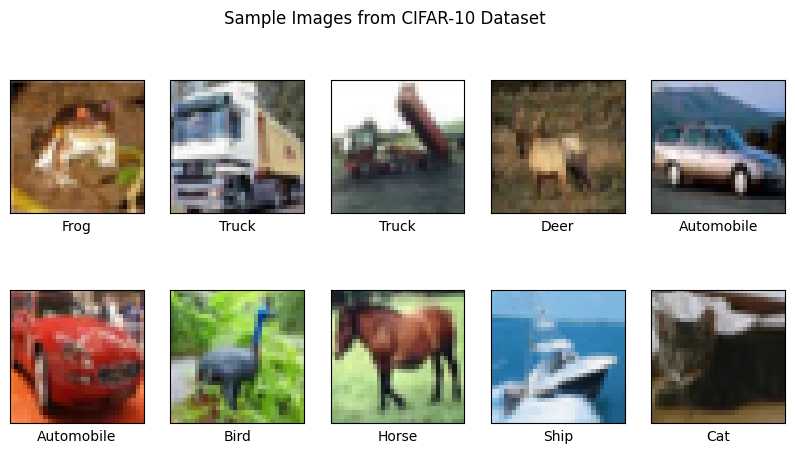

In [3]:
# Create a figure to display images
plt.figure(figsize=(10, 5))

# Loop to show the first 10 images from the training set
for i in range(10):
    plt.subplot(2, 5, i+1) # 2 rows, 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Display the image
    plt.imshow(train_images[i])
    # Add the label below the image
    plt.xlabel(class_names[train_labels[i][0]])

plt.suptitle("Sample Images from CIFAR-10 Dataset")
plt.show()

In [4]:
model = models.Sequential()

# 1. Feature Extraction (The Convolutional Base)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 2. Classification (The Dense Layers)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # 10 output classes

model.summary()

/home/blueberry/Desktop/ml_tutorial/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-11 05:43:09.798631: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("Starting training...")
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Starting training...
Epoch 1/10


2025-12-11 05:43:28.573791: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.


1558/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3439 - loss: 1.7720

2025-12-11 05:43:49.760743: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.4443 - loss: 1.5190 - val_accuracy: 0.5641 - val_loss: 1.2263
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5998 - loss: 1.1308 - val_accuracy: 0.5965 - val_loss: 1.1078
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6541 - loss: 0.9854 - val_accuracy: 0.6512 - val_loss: 0.9901
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6909 - loss: 0.8889 - val_accuracy: 0.6327 - val_loss: 1.0642
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7127 - loss: 0.8200 - val_accuracy: 0.6819 - val_loss: 0.9275
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7308 - loss: 0.7675 - val_accuracy: 0.7036 - val_loss: 0.8508
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7514 - loss: 0.7166 - val_accuracy: 0.6986 - val_loss: 0.8801
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7627 - loss: 0.67

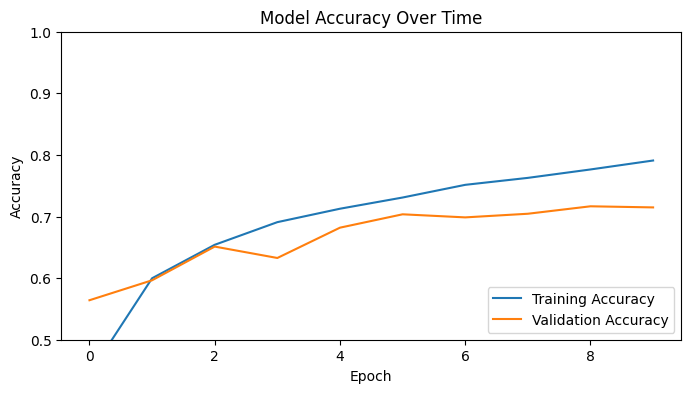

In [6]:
# # Evaluation Stage

plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Model Accuracy Over Time")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


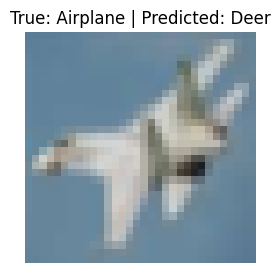

❌ Prediction incorrect.


In [7]:
# Select an image index (change this number to see different results)
index = 10 

# Grab the image
img = test_images[index]
true_label = class_names[test_labels[index][0]]

# Predict
# Add batch dimension (1, 32, 32, 3) because model expects a batch
img_batch = np.expand_dims(img, 0)
predictions = model.predict(img_batch)
predicted_label = class_names[np.argmax(predictions)]

# Display
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.title(f"True: {true_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()

if true_label == predicted_label:
    print("✅ Prediction matches!")
else:
    print("❌ Prediction incorrect.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


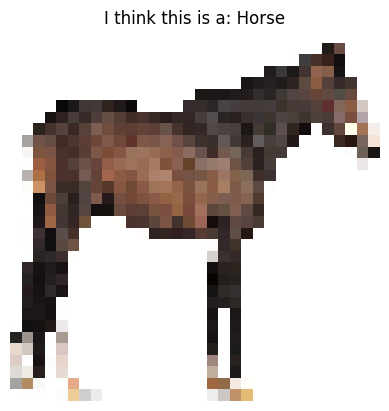

In [13]:
# Load a local image file
# Make sure 'my_horse.jpg' is in the same folder as your notebook code
import PIL

try:
    # 1. Load image and resize to 32x32 (the size our model expects)
    user_img_path = "5.png"
    img = tf.keras.utils.load_img(user_img_path, target_size=(32, 32))
    
    # 2. Convert to array and normalize
    img_array = tf.keras.utils.img_to_array(img)
    img_array = img_array / 255.0
    img_batch = np.expand_dims(img_array, 0)

    # 3. Predict
    prediction = model.predict(img_batch)
    result = class_names[np.argmax(prediction)]

    # 4. Show
    plt.imshow(img)
    plt.title(f"I think this is a: {result}")
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Error: Could not load image. Make sure the file exists. ({e})")